9. In this exercise, we will predict the number of applications received using the other variables in the `College` data set.

In [1]:
library("ISLR2")
#library("MASS")
library("ggplot2")
library("ggthemes")
#library("boot")
library("skimr")
library("caret")
library("leaps")
library("glmnet")
library("pls")
library("patchwork")
library("corrplot")

# Define a color cycle to use
colors <- colorblind_pal()(8)


Loading required package: lattice

Loading required package: Matrix

Loaded glmnet 4.1-2


Attaching package: ‘pls’


The following object is masked from ‘package:caret’:

    R2


The following object is masked from ‘package:stats’:

    loadings


corrplot 0.90 loaded


Attaching package: ‘corrplot’


The following object is masked from ‘package:pls’:

    corrplot




In [2]:
head(College)

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
Albertson College,Yes,587,479,158,38,62,678,41,13500,3335,500,675,67,73,9.4,11,9727,55


In [3]:
skim(College)

── Data Summary ────────────────────────
                           Values 
Name                       College
Number of rows             777    
Number of columns          18     
_______________________           
Column type frequency:            
  factor                   1      
  numeric                  17     
________________________          
Group variables            None   

── Variable type: factor ───────────────────────────────────────────────────────
  skim_variable n_missing complete_rate ordered n_unique top_counts       
1 Private               0             1 FALSE          2 Yes: 565, No: 212

── Variable type: numeric ──────────────────────────────────────────────────────
   skim_variable n_missing complete_rate    mean      sd     p0    p25    p50
 1 Apps                  0             1  3002.  3870.     81    776   1558  
 2 Accept                0             1  2019.  2451.     72    604   1110  
 3 Enroll                0             1   780.   929.     35

In [4]:
print(colSums(is.na(College)))

    Private        Apps      Accept      Enroll   Top10perc   Top25perc 
          0           0           0           0           0           0 
F.Undergrad P.Undergrad    Outstate  Room.Board       Books    Personal 
          0           0           0           0           0           0 
        PhD    Terminal   S.F.Ratio perc.alumni      Expend   Grad.Rate 
          0           0           0           0           0           0 


In [5]:
names(College)

[1] "Private"     "Apps"        "Accept"      "Enroll"      "Top10perc"  
 [6] "Top25perc"   "F.Undergrad" "P.Undergrad" "Outstate"    "Room.Board" 
[11] "Books"       "Personal"    "PhD"         "Terminal"    "S.F.Ratio"  
[16] "perc.alumni" "Expend"      "Grad.Rate"

(a) Split the data set into a training set and a test set.

In [6]:
dim(College)

[1] 777  18

In [7]:
train_rows <- createDataPartition(College$Apps, p = 0.6, list = F)

In [8]:
Xy_train <- College[train_rows, ]
Xy_test <- College[-train_rows, ]

In [9]:
dim(Xy_train)
dim(Xy_test)

[1] 468  18

[1] 309  18

In [10]:
head(Xy_train)

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Albertson College,Yes,587,479,158,38,62,678,41,13500,3335,500,675,67,73,9.4,11,9727,55
Albertus Magnus College,Yes,353,340,103,17,45,416,230,13290,5720,500,1500,90,93,11.5,26,8861,63
Albion College,Yes,1899,1720,489,37,68,1594,32,13868,4826,450,850,89,100,13.7,37,11487,73


In [11]:
# Check for near zero variance variables
nzv <- nearZeroVar(Xy_train, saveMetrics = TRUE)
nzv[nzv$nzv, ][1:10, ]

,freqRatio,percentUnique,zeroVar,nzv
,<dbl>,<dbl>,<lgl>,<lgl>
NA,NA,NA,NA,NA
NA.1,NA,NA,NA,NA
NA.2,NA,NA,NA,NA
NA.3,NA,NA,NA,NA
NA.4,NA,NA,NA,NA
NA.5,NA,NA,NA,NA
NA.6,NA,NA,NA,NA
NA.7,NA,NA,NA,NA
NA.8,NA,NA,NA,NA


In [12]:
nzv <- nearZeroVar(Xy_train)
filteredDescr <- Xy_train[, -nzv]
dim(filteredDescr)

[1] 468   0

In [13]:
numeric_cols <- sapply(Xy_train, is.numeric)
print(numeric_cols)

    Private        Apps      Accept      Enroll   Top10perc   Top25perc 
      FALSE        TRUE        TRUE        TRUE        TRUE        TRUE 
F.Undergrad P.Undergrad    Outstate  Room.Board       Books    Personal 
       TRUE        TRUE        TRUE        TRUE        TRUE        TRUE 
        PhD    Terminal   S.F.Ratio perc.alumni      Expend   Grad.Rate 
       TRUE        TRUE        TRUE        TRUE        TRUE        TRUE 


In [14]:
# Check correlation between predictors
descr_cor <- cor(Xy_train[, numeric_cols])
high_corr <- sum(abs(descr_cor[upper.tri(descr_cor)]) > 0.8)
high_corr

[1] 8

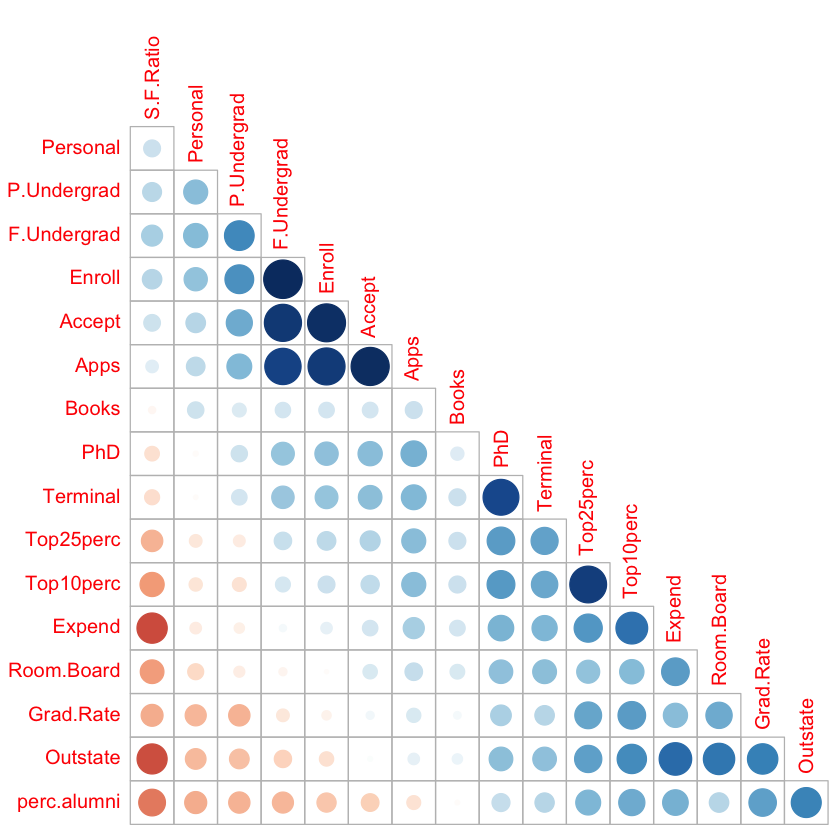

In [15]:
corrplot(
    cor(Xy_train[, numeric_cols]),
    order = "AOE",
    cl.pos = "n",
    type = "lower",
    diag = FALSE
)

In [16]:
# Normalize training dataset with target included by centering and scaling
fit_normalization <- preProcess(Xy_train, method = c("center", "scale"))
Xy_train_std <- predict(fit_normalization, Xy_train)
Xy_test_std <- predict(fit_normalization, Xy_test)
head(Xy_train_std)

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Abilene Christian University,Yes,-0.3710970,-0.33917097,-0.07364203,-0.2621529,-0.2015451,-0.1873512,-0.2178051,-0.7267877,-0.9440206,-0.6563923,1.3008218,-0.1880585,-0.1430747,1.0335755,-0.8582407,-0.50316347,-0.3023861
Adelphi University,Yes,-0.2256921,-0.04191598,-0.30873699,-0.6550225,-1.3616690,-0.2289410,0.2094173,0.4632001,1.9242003,1.4110314,0.2459996,-2.7934488,-3.5085507,-0.5138455,-0.5351058,0.19354215,-0.5340009
Adrian College,Yes,-0.4352299,-0.39716146,-0.50671169,-0.3182771,-0.3024255,-0.5680421,-0.4889985,0.2099589,-0.5342747,-1.0009629,-0.2588082,-1.2683423,-0.9844437,-0.3302532,0.5958662,-0.16460371,-0.6498084
Albertson College,Yes,-0.6677118,-0.66262906,-0.70693611,0.5797105,0.3028566,-0.6417508,-0.5249100,0.7631557,-0.9121514,-0.3118217,-0.9971837,-0.3786968,-0.4936451,-1.2482148,-0.9390244,0.03365561,-0.5919047
Albertus Magnus College,Yes,-0.7323976,-0.72233779,-0.76880320,-0.5988983,-0.5546263,-0.6956940,-0.4078882,0.7115240,1.2595015,-0.3118217,0.2459996,1.0828637,0.9086366,-0.6974379,0.2727314,-0.13942158,-0.1286749
Albion College,Yes,-0.3050290,-0.12954607,-0.33460868,0.5235863,0.6054976,-0.4531554,-0.5304824,0.8536342,0.4454731,-0.6563923,-0.7334782,1.0193176,1.3994351,-0.1204334,1.1613523,0.38540600,0.4503622


In [17]:
dummies_model <- dummyVars(Apps ~ ., data = Xy_train_std)

aux <- Xy_train_std[, "Apps"]
Xy_train_std <- predict(dummies_model, newdata = Xy_train_std)
Xy_train_std <- data.frame(Xy_train_std, Apps = aux)
head(Xy_train_std)

,Private.No,Private.Yes,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Apps
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Abilene Christian University,0,1,-0.33917097,-0.07364203,-0.2621529,-0.2015451,-0.1873512,-0.2178051,-0.7267877,-0.9440206,-0.6563923,1.3008218,-0.1880585,-0.1430747,1.0335755,-0.8582407,-0.50316347,-0.3023861,-0.3710970
Adelphi University,0,1,-0.04191598,-0.30873699,-0.6550225,-1.3616690,-0.2289410,0.2094173,0.4632001,1.9242003,1.4110314,0.2459996,-2.7934488,-3.5085507,-0.5138455,-0.5351058,0.19354215,-0.5340009,-0.2256921
Adrian College,0,1,-0.39716146,-0.50671169,-0.3182771,-0.3024255,-0.5680421,-0.4889985,0.2099589,-0.5342747,-1.0009629,-0.2588082,-1.2683423,-0.9844437,-0.3302532,0.5958662,-0.16460371,-0.6498084,-0.4352299
Albertson College,0,1,-0.66262906,-0.70693611,0.5797105,0.3028566,-0.6417508,-0.5249100,0.7631557,-0.9121514,-0.3118217,-0.9971837,-0.3786968,-0.4936451,-1.2482148,-0.9390244,0.03365561,-0.5919047,-0.6677118
Albertus Magnus College,0,1,-0.72233779,-0.76880320,-0.5988983,-0.5546263,-0.6956940,-0.4078882,0.7115240,1.2595015,-0.3118217,0.2459996,1.0828637,0.9086366,-0.6974379,0.2727314,-0.13942158,-0.1286749,-0.7323976
Albion College,0,1,-0.12954607,-0.33460868,0.5235863,0.6054976,-0.4531554,-0.5304824,0.8536342,0.4454731,-0.6563923,-0.7334782,1.0193176,1.3994351,-0.1204334,1.1613523,0.38540600,0.4503622,-0.3050290


In [18]:
aux <- Xy_test_std[, "Apps"]
Xy_test_std <- predict(dummies_model, newdata = Xy_test_std)
Xy_test_std <- data.frame(Xy_test_std, Apps = aux)
head(Xy_test_std)

,Private.No,Private.Yes,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Apps
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Agnes Scott College,0,1,-0.71847176,-0.7305581,1.8144434,1.6647411,-0.6763403,-0.51128839,0.63038851,1.01365400,-0.6563923,-0.6958059,1.209955891,1.1890929,-1.6940819,1.1613523,1.89013825,-0.3602898,-0.71470579
Alaska Pacific University,0,1,-0.80567228,-0.8227963,-0.6550225,-0.6050665,-0.7300777,-0.01224302,-0.69728382,-0.19737258,1.7556020,0.2459996,0.193218183,-0.5637592,-0.5925280,-1.6660779,0.27248613,-2.9080533,-0.77662725
Albright College,0,1,-0.50798774,-0.6293210,0.1307167,0.3532967,-0.5810132,-0.36083179,1.27824344,0.05758038,-1.6901042,-1.2608893,0.383856504,0.2776098,-0.7498928,0.0303802,0.41678374,0.8556883,-0.54303960
Alderson-Broaddus College,0,1,-0.65446743,-0.6911881,-0.3744014,-0.6050665,-0.6168381,-0.50200095,0.01769232,-0.87117685,0.7908043,0.6980663,-2.094441658,-2.7372957,-0.6974379,-0.6158896,-0.11344002,-0.7656158,-0.66909400
Allegheny College,0,1,-0.05222541,-0.3402330,0.9164558,1.0594591,-0.4298898,-0.52305249,1.64335333,0.09400223,-1.0009629,-1.1102004,0.002579863,0.7684084,-1.1170775,1.4844872,0.43017424,0.6240734,-0.09687337
Alma College,0,1,-0.40446397,-0.4515937,0.9164558,0.8576984,-0.5124518,-0.53295910,0.53499280,0.19598342,-1.0009629,-1.4115782,0.383856504,0.4879521,0.2992062,0.7574337,-0.05068455,0.1608437,-0.47973597


(b) Fit a linear model using least squares on the training set, and report the test error obtained.

In [19]:
linreg_fit <- lm(Apps ~ . - Private.No, data = Xy_train_std)
linreg_summary <- summary(linreg_fit)
linreg_summary


Call:
lm(formula = Apps ~ . - Private.No, data = Xy_train_std)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.9552 -0.1219 -0.0133  0.0816  1.9366 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.112107   0.036386   3.081 0.002189 ** 
Private.Yes -0.156616   0.047711  -3.283 0.001109 ** 
Accept       0.807312   0.041012  19.685  < 2e-16 ***
Enroll      -0.044949   0.057079  -0.787 0.431409    
Top10perc    0.209181   0.030930   6.763 4.21e-11 ***
Top25perc   -0.060307   0.027487  -2.194 0.028744 *  
F.Undergrad  0.111718   0.047879   2.333 0.020072 *  
P.Undergrad  0.007638   0.016748   0.456 0.648564    
Outstate    -0.069475   0.026554  -2.616 0.009185 ** 
Room.Board   0.046134   0.017741   2.600 0.009616 ** 
Books        0.000251   0.013382   0.019 0.985043    
Personal    -0.003287   0.014806  -0.222 0.824428    
PhD         -0.040154   0.024212  -1.658 0.097919 .  
Terminal    -0.004071   0.023938  -0.170 0.865047    
S.F.Ratio    0.00

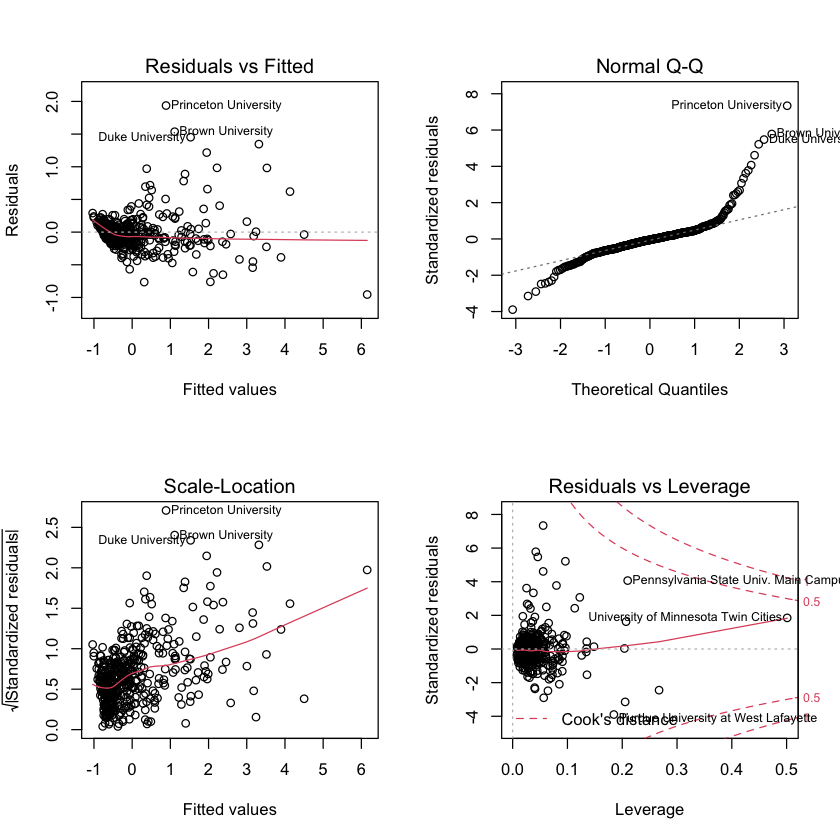

In [20]:
par(mfrow = c(2, 2))
plot(linreg_fit)

In [21]:
linreg_pred_train <- predict(
    linreg_fit,
    Xy_train_std[names(Xy_train_std) != "Apps"]
)
cat(
    "Train error: ",
    round(mean((linreg_pred_train - Xy_train_std[, "Apps"])^2), 5),
    "\n"
)

linreg_pred_test <- predict(
    linreg_fit,
    Xy_test_std[names(Xy_test_std) != "Apps"]

)
cat(
    "Test error: ",
    round(mean((linreg_pred_test - Xy_test_std[, "Apps"])^2), 5)
)

Train error:  0.0709 
Test error:  0.11517

(c) Fit a ridge regression model on the training set, with $\lambda$ chosen by cross-validation.
Report the test error obtained.

[1] 0.09397503

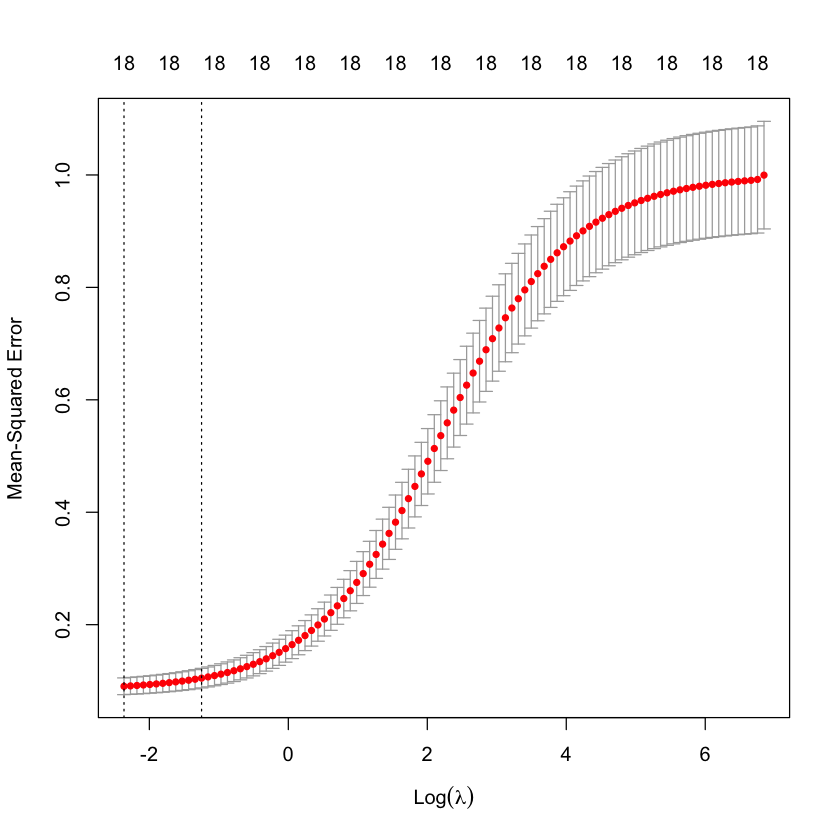

In [22]:
set.seed(1)
ridge_cv <- cv.glmnet(
    as.matrix(Xy_train_std[, names(Xy_train_std) != "Apps"]),
    as.matrix(Xy_train_std[, "Apps"]),
    alpha = 0, # ridge
)

plot(ridge_cv)

best_lambda <- ridge_cv$lambda.min
best_lambda

In [23]:
ridge_refit <- glmnet(
    as.matrix(Xy_train_std[, names(Xy_train_std) != "Apps"]),
    as.matrix(Xy_train_std[, "Apps"]),
    lambda = best_lambda,
    alpha = 0
)
print(predict(ridge_refit, type = "coefficients", s = best_lambda)[1:18, ])

  (Intercept)    Private.No   Private.Yes        Accept        Enroll 
 0.0360533472  0.0823058794 -0.0830437267  0.4938616163  0.1885715973 
    Top10perc     Top25perc   F.Undergrad   P.Undergrad      Outstate 
 0.1257378917 -0.0006833753  0.1614288259 -0.0037274239 -0.0042203846 
   Room.Board         Books      Personal           PhD      Terminal 
 0.0602932487  0.0060004074 -0.0138435713 -0.0191315167 -0.0132166099 
    S.F.Ratio   perc.alumni        Expend 
 0.0122565669 -0.0284144414  0.0984693228 


In [24]:
ridge_pred_train <- predict(
    ridge_refit,
    s = best_lambda,
    newx = as.matrix(Xy_train_std[, names(Xy_train_std) != "Apps"])
)

mean((ridge_pred_train - Xy_train_std[, "Apps"])^2)

[1] 0.08148436

In [25]:
ridge_pred_test <- predict(
    ridge_refit,
    s = best_lambda,
    newx = as.matrix(Xy_test_std[, names(Xy_test_std) != "Apps"])
)

mean((ridge_pred_test - Xy_test_std[, "Apps"])^2)

[1] 0.1932657

(d) Fit a lasso model on the training set, with $\lambda$ chosen by cross-validation. 
Report the test error obtained, along with the number of non-zero coefficient estimates.

[1] 0.005133177

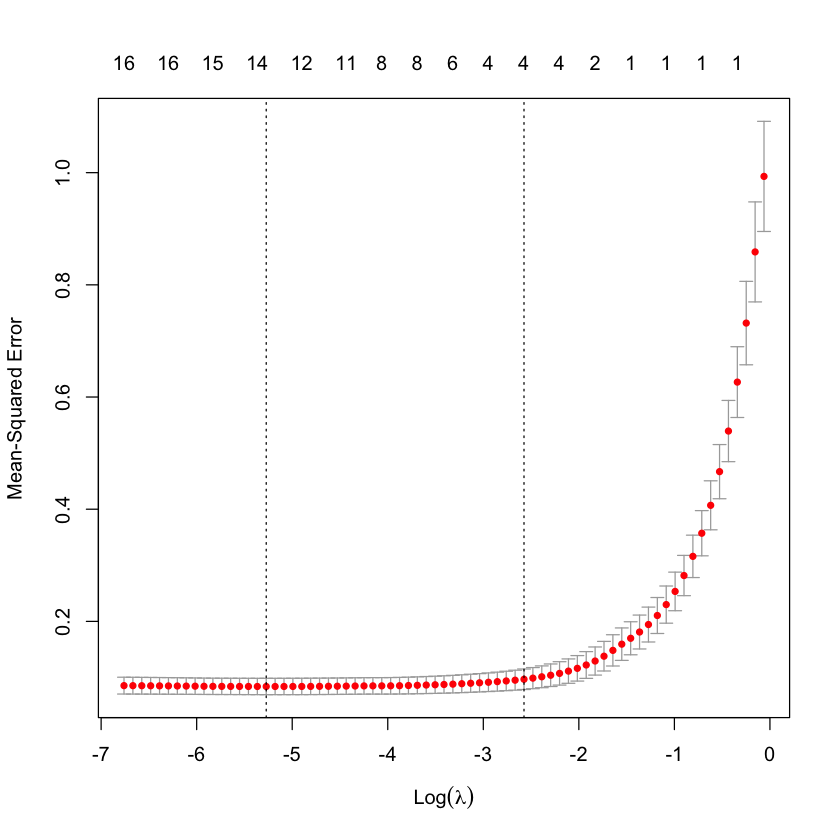

In [27]:
set.seed(1)
lasso_cv <- cv.glmnet(
    as.matrix(Xy_train_std[, names(Xy_train_std) != "Apps"]),
    as.matrix(Xy_train_std[, "Apps"]),
    alpha = 1, # lasso
)

plot(lasso_cv)

best_lambda_lasso <- lasso_cv$lambda.min
best_lambda_lasso

In [28]:
lasso_refit <- glmnet(
    as.matrix(Xy_train_std[, names(Xy_train_std) != "Apps"]),
    as.matrix(Xy_train_std[, "Apps"]),
    lambda = best_lambda_lasso,
    alpha = 1
)
print(predict(lasso_refit, type = "coefficients", s = best_lambda_lasso)[1:18, ])

  (Intercept)    Private.No   Private.Yes        Accept        Enroll 
-4.146458e-02  1.459055e-01 -3.663014e-14  7.817357e-01  0.000000e+00 
    Top10perc     Top25perc   F.Undergrad   P.Undergrad      Outstate 
 1.617733e-01 -1.817370e-02  9.178660e-02  0.000000e+00 -4.422386e-02 
   Room.Board         Books      Personal           PhD      Terminal 
 3.545779e-02  0.000000e+00  0.000000e+00 -2.684545e-02 -3.200586e-03 
    S.F.Ratio   perc.alumni        Expend 
 6.765143e-05 -6.518309e-03  8.953439e-02 


In [29]:
lasso_pred_train <- predict(
    lasso_refit,
    s = best_lambda_lasso,
    newx = as.matrix(Xy_train_std[, names(Xy_train_std) != "Apps"])
)

mean((lasso_pred_train - Xy_train_std[, "Apps"])^2)

[1] 0.07193931

In [30]:
lasso_pred_test <- predict(
    lasso_refit,
    s = best_lambda_lasso,
    newx = as.matrix(Xy_test_std[, names(Xy_test_std) != "Apps"])
)

mean((lasso_pred_test - Xy_test_std[, "Apps"])^2)

[1] 0.1213964

(e) Fit a PCR model on the training set, with $M$ chosen by cross-validation. 
Report the test error obtained, along with the value of $M$ selected by cross-validation.

In [37]:
set.seed(1)
pcr_fit <- pcr(
    Apps ~ . - Private.No,
    data = Xy_train_std,
    scale = TRUE,
    validation = "CV"
)

summary(pcr_fit)

Data: 	X dimension: 468 17 
	Y dimension: 468 1
Fit method: svdpc
Number of components considered: 17

VALIDATION: RMSEP
Cross-validated using 10 random segments.
       (Intercept)  1 comps  2 comps  3 comps  4 comps  5 comps  6 comps
CV           1.001    1.013   0.4823   0.4831   0.4321   0.3688   0.3548
adjCV        1.001    1.014   0.4815   0.4824   0.4220   0.3653   0.3534
       7 comps  8 comps  9 comps  10 comps  11 comps  12 comps  13 comps
CV      0.3536   0.3415   0.3258    0.3251    0.3283    0.3302    0.3281
adjCV   0.3509   0.3405   0.3248    0.3241    0.3273    0.3290    0.3266
       14 comps  15 comps  16 comps  17 comps
CV       0.3309    0.3314    0.3039    0.3001
adjCV    0.3296    0.3302    0.3023    0.2982

TRAINING: % variance explained
      1 comps  2 comps  3 comps  4 comps  5 comps  6 comps  7 comps  8 comps
X      31.499    58.07    64.68    70.29    75.85    80.80    84.45    87.98
Apps    1.499    77.70    77.79    84.31    87.90    88.56    88.98    89.4

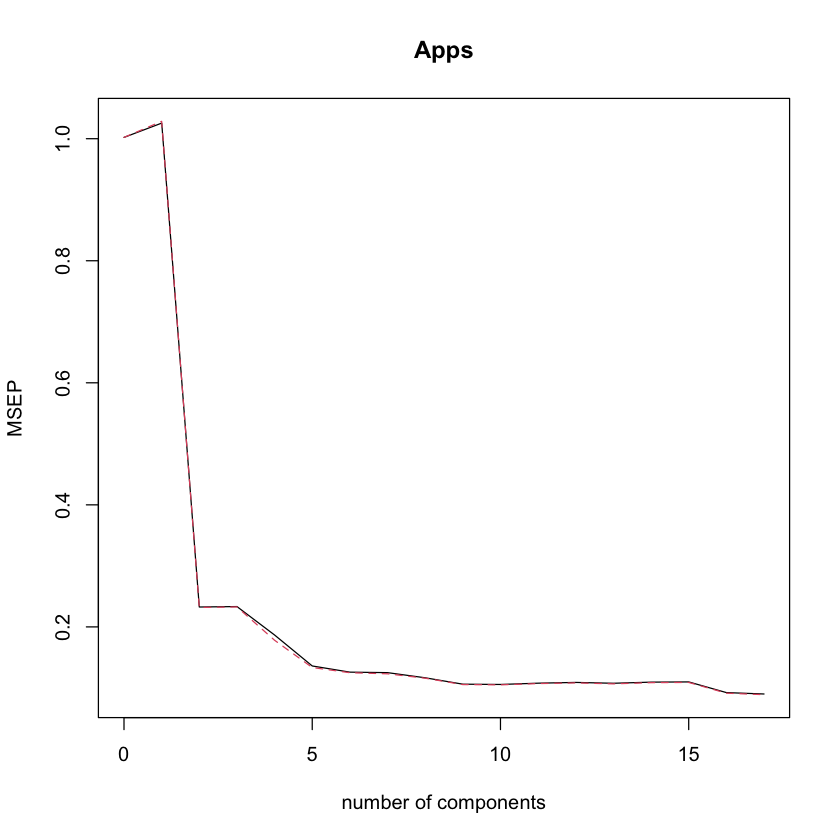

In [38]:
validationplot(pcr_fit, val.type = "MSEP")

There is no reduction using the PCR as the best choice according to the MSE is to use all the predictors.

In [41]:
pcr_pred <- predict(pcr_fit, Xy_test_std[, names(Xy_test_std) != "Apps"], ncomp = 17)
mean((pcr_pred - Xy_test_std[, "Apps"])^2)

[1] 0.115172

(f) Fit a PLS model on the training set, with $M$ chosen by cross-validation. 
Report the test error obtained, along with the value of $M$ selected by cross-validation.

In [42]:
set.seed(1)
pls_fit <- plsr(
    Apps ~ . - Private.No,
    data = Xy_train_std,
    scale = TRUE,
    validation = "CV"
)

summary(pls_fit)

Data: 	X dimension: 468 17 
	Y dimension: 468 1
Fit method: kernelpls
Number of components considered: 17

VALIDATION: RMSEP
Cross-validated using 10 random segments.
       (Intercept)  1 comps  2 comps  3 comps  4 comps  5 comps  6 comps
CV           1.001   0.4373   0.3224   0.3232   0.3193   0.3140   0.3079
adjCV        1.001   0.4359   0.3196   0.3221   0.3176   0.3107   0.3056
       7 comps  8 comps  9 comps  10 comps  11 comps  12 comps  13 comps
CV      0.3031   0.3000   0.2998     0.301    0.3012    0.3003    0.3001
adjCV   0.3011   0.2983   0.2980     0.299    0.2992    0.2984    0.2982
       14 comps  15 comps  16 comps  17 comps
CV       0.3001    0.3001    0.3001    0.3001
adjCV    0.2982    0.2983    0.2982    0.2982

TRAINING: % variance explained
      1 comps  2 comps  3 comps  4 comps  5 comps  6 comps  7 comps  8 comps
X       26.57    36.81    63.37    66.55    69.12    73.40    77.10    80.37
Apps    82.25    89.55    90.70    91.51    92.36    92.69    92.78    

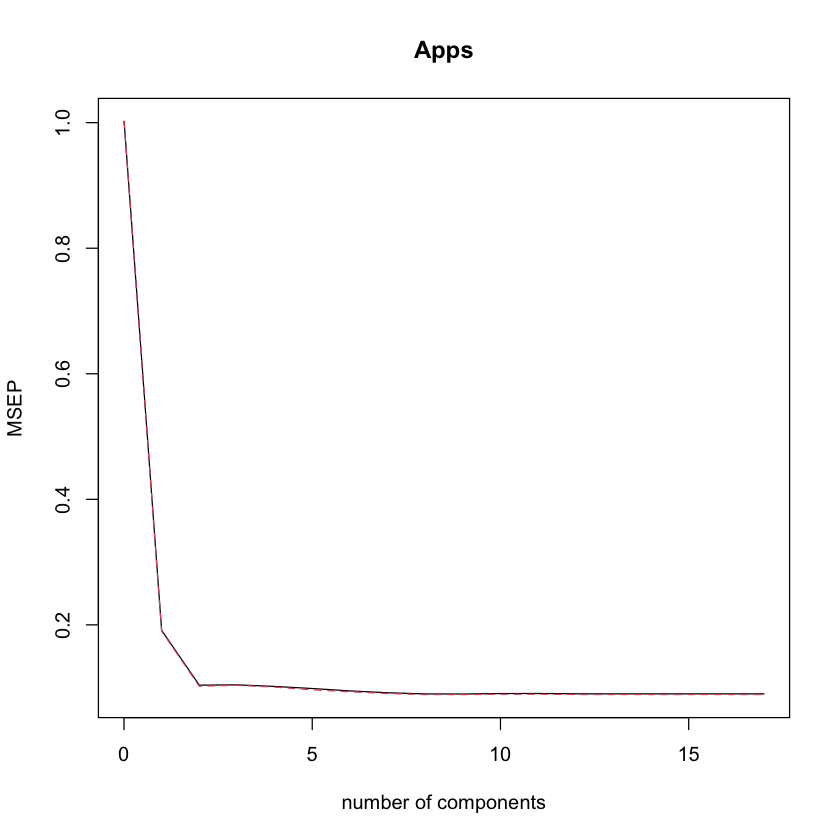

In [43]:
validationplot(pls_fit, val.type = "MSEP")

In [58]:
pls_pred <- predict(pls_fit, Xy_test_std[, names(Xy_test_std) != "Apps"], ncomp = 12)
mean((pls_pred - Xy_test_std[, "Apps"])^2)

[1] 0.1149112

It seems like $M=12$ is the right number of componentsin the case of PLS.